## Brief tutorial on data cleaning, data visualisation  and simple linear regression model. 
This is a tutorial I gave to the University of Johannesburg data science and machine learning club on the 7th of september 2019. It is bassically an introduction to data cleaning and data visualuation with various libraries from python. 
> Author: Carmel Dansou

## Introduction
In this notebook, I am going to take the reader through some basic steps through cleaning and visualization of data. The data we are using is the Auto data from the book <span style ="color:red">**Introduction to statistical learning with application in R**</span> written by Gareth James, Daniela Witten, Trevor Hastie
and Robert Tibshirani. The Auto data is on the gas mileage, horsepower, and other information for cars surveyed in the USA. The data set can be fetched from  <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/data.html"> Auto_csv()</a>

First of all, I will import the necessary python package for the task. I am importing  the <span style="color:blue"> pandas library </span>, the <span style="color:blue"> numpy library </span>, the <span style="color:blue"> matplotlib library </span> and the <span style="color:blue"> seaborn library </span>.

In [0]:
from google.colab import files # Don't run this cell if you are not usiing google colab
uploaded = files.upload() # If you are using colab then run it and select the auto data from your computer.

Saving Auto.csv to Auto.csv


In [ ]:
# If you want to run this in your notebook. Remember to put the auto file in the same directory as your notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # optional, I put it here because I want to explore its functionalities
#sns.set_style("whitegrid")

Once the libraries imported, I am now loading the data set. The line of code to do it is the one in the cell below. I did so because the Auto data is already in my work directory, else I would have to specify a path to fetch it. If you want to dig in, here is a tutorial from *Datacamp* that you may want to look at: <a href="https://www.datacamp.com/community/tutorials/pandas-read-csv">Importing Data with read_csv()</a>

In [2]:
data=pd.read_csv("Auto.csv")

Data loaded. Now one needs to look at the data. It always a good pratice to do so. It helps to see the different features in our data.

In [4]:
data.head() # by default, python shows the first five rows of the data set.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


The first row is the features row. It gives you the names of the different features in your data set. The first column at the left is the index column. Note that pandas does not count the first row. The count starts at the first observation. Also an important remark is that Python index starts at zero.

In [5]:
data.shape # This gives the dimension of the data set. The number of observation and the number of features

(397, 9)

From the output, we infer that the data is made of 397 observations and 9 features. Next, let us have a look at the types of the features in our data set.

In [6]:
data.dtypes # One could also use data.info(), but I prefer data.dtypes. But it is good to try elseway

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Looking at the type of features in our data set. This very important in any data analysis. If you look at the horsepower, it is saying object. That is not true. There is obviously something wrong with the horsepower column. We know that it must of float type but python is seeing as object. Since it is a small size data set I look quickly at it and discover that it contains some question marks in the horsepower's column. We need to clean it up. Probably these are missing values that is why the data set recorder put question marks.

## Looking for missing values
We already detect that some data are missing in the horsepower column. Let us see if they are other missing values. Moreover let us see if pandas will see those question marks as missing values.

In [7]:
data.isnull().sum() # This displays the total missing values by feature i.e in every column.

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [8]:
data.isnull().any() # An alternative way to look for missing values. You get a boolean as output.

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

Lo and behold. Pandas does not see the question marks as missing values. Why? It is because "?" is not a **standard missing value**. There are in general two types of missing values: <span style="color:blue"> standard missing values </span> and <span style="color:blue"> non-standard missing values </span>. Standard missing values are: <span style="color:green"> NA and empty cell </span>. When Pandas sees NA or en empty cell, it takes it as missing values. But any other characters (non-standard missing values) are not detected by Pandas. And that is what s happening here. Now how do you deal with that?

> One way is to define the character(s) as missing values and pass it as argument when load your dataset. But this assumes that you know the character(s) beforehand.

In [9]:
missing_values = ["?"] # we define the question mark as missing data. And pass it to pandas when loading the data
data_0=pd.read_csv("Auto.csv",na_values = missing_values)

In [0]:
data_0.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Now one could see that it corrects the error on the type of horsepower. Let us look and see if it detects the questions marks as missing values after this.

In [10]:
data_0.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

It works. One could see that it says that they are five missing values in the horsepower column. And that is it. But wait...what if we don't know the character(s) at all? and our dataset is very large so that we can't go through it to detect the character(s). Then here is what we could do. And this brings us to the second option.
> We will ask pandas to bring out the rows where it is not able to convert the values to numerical. Because that is why it is seeinh horsepower as object instead of float.

In [11]:
data.loc[pd.to_numeric(data['horsepower'], errors='coerce').isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


As expected, it brings out those rows with the queston mark. There are five of them. This way of doing seems more general. It will work of any non standard missing values.

## Cleaning up the missing values
Generally, there are two ways of dealing with missing data when one encounter them. Either one remove the observations containing them or one replace them by a predefined value. We are going to explore both option in the following cells.

## *Imputing the missing values*

> <span style ="color:red">**Replacement the missing values with a statistical characteristic of the attribute.**</span> Again here one could replace by a statistical characteristic (mean, median, max, min, mode ) of the affected feature or a constant value. Here we chose to replace by the median of the attribute horsepower.

In [12]:
med = data_0['horsepower'].median()
data_0['horsepower'].fillna(med, inplace=True)

Now that we have replaced the missing values by the median of the horsepower attribute, let us check whether it works or not by asking the print out of the total number of missing values.

In [13]:
data_0.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

As expected it detects not missing values. That is great. One would get the same result by replacing median by mean, max or min of the horsepower feature.

> <span style ="color:red">**Replacement the missing values with a constant.**</span> Here one replace missing values by a meaningful constant value or by a value from another selected record or by a constant value estimated by another predictive model. Here we chose to replace it by 135.

In [14]:
data_00=data_0['horsepower'].fillna(135, inplace=True)

## *Removing the rows with missing values*
Because missing values can hurt the performance of many machine learning algorithms (e.g Linear Discriminant Analysis), it is pereferable sometimes to remove the rows containing those missing values.

In [15]:
data_1=pd.read_csv("Auto.csv",na_values = missing_values) # I am loading again my uncleaned data set

In [16]:
data_1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [17]:
data_1.dropna(axis=0, inplace=True) # dropping the rows with missing values

In [18]:
data_1.shape

(392, 9)

Now one could notice that the dimension of our data set has changed. It has five rows less than the initial dataset. Now that we know how to deal with the missing data. Let perform a simple linear regression model. All we have done so far is called data preparation in machine learning. It is a fundamental step in building any machine learning algorithm.

## Data visualization with matplolib and seaborn
Here I would like to introduce the reader to some functionalities of matplotlib and seaborn. They are very handy libraries to visualize data in Python. Let us look at them.

In [0]:
# Pair plot with seaborn
sns.pairplot(data_0, hue="origin", height=2.5)

## 1.*Scatter Plot with seaborn*
Now let us look at a simple scatter plot with the seaborn library. We will look at the relationship between the *horsepower* and the *mpg*.

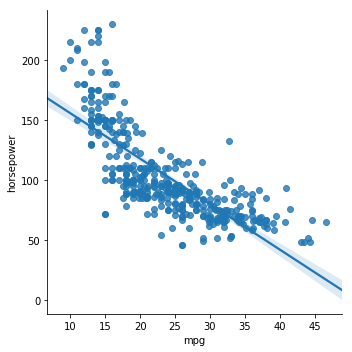

In [20]:
# A simple scatter plot
sns.lmplot(x="mpg", y="horsepower", data=data_0)

From this graph, one could easily comment on the behaviour of the horsepower in term of the mgp of the different cars. Clearly as the horsepower of the cars increases, their mpg decrease.

## 2.Join plot with seaborn
The joinplot allows you to see the distribution of the x and y data. It also interpolates though those data and try to find the best distribution that fits them weel.

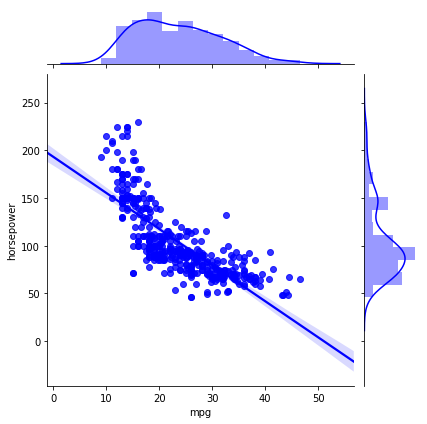

In [21]:
# join plot with seaborn
sns.jointplot("mpg", "horsepower", data=data_0, kind="reg", color="b")

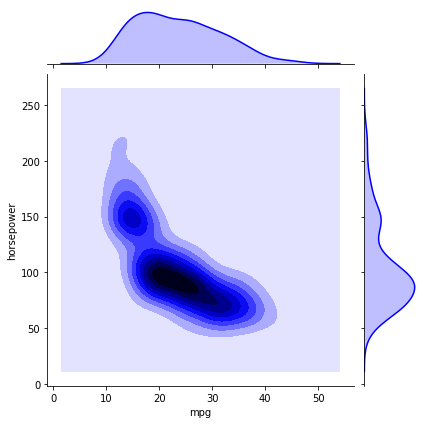

In [22]:
# contour plot with seaborn
sns.jointplot("mpg", "horsepower", data=data_0, kind="kde", space=0.2, color="b")

## Simple linear regression model with the sklearn package
Here I would like to expose the reader to how to build a simple linear regression model using the sklearn package in python.

> **Looking first at the correction:**
Let us first look at the correlation matrix of the data. The dataset is small, one can easily compute the standard Pearson correlation between every pair of features using the corr() method. The mathematical formula for this coefficient is given by the following:


$$ r_{xy} = \dfrac{Cov(X,Y)}{\sigma_{X}\sigma_{Y}}$$

 Where $Cov(X,Y)$ is the covariance of the pair ($X,Y$) and $\sigma_{X}$, $\sigma_{Y}$ their respective   variance. The correlation coefficent range from $-1$ to $1$. When it is close to $1$, this means that the pair of variable are strongly positively correlated. When it is close to $-1$, the pair of variables are strongly negatively correlated. When close to zero, it means that there is not linear correlation between the two variables.

In [33]:
corr_matrix=data_0.corr()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.773582,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.841536,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.895765,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.773582,0.841536,0.895765,1.000000,0.862590,-0.688167,-0.413992,-0.452943
weight,-0.831739,0.897017,0.933104,0.862590,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.688167,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413992,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.452943,-0.581265,0.210084,0.184314,1.000000


> Focusing only on the horsepower values

In [26]:
corr_matrix["horsepower"].sort_values()

mpg            -0.773582
acceleration   -0.688167
origin         -0.452943
year           -0.413992
cylinders       0.841536
weight          0.862590
displacement    0.895765
horsepower      1.000000
Name: horsepower, dtype: float64

One could see that the linear correlation bewteen horsepower and displacement is strong and positive. One could say that the horsepower is linearly dependent on displacement than any other attributes of the dataset. Let us now build a linear regression model of this two variables.

> **The linear model:** First we will import the model and the metric we intend to use from the sklearn package. Our model is basically the linear regression and the metric is the mean square error.

In [27]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

Now I am selecting my data and the labels. Since we are building a one variable linear regression, we are just using the mpg and the horsepower columns. We basically want to see how accurate from the horsepower one could predict the mpg of the various cars.

In [28]:
x=np.array(data_0.displacement).reshape(-1,1) #need to be converted into array and reshaped as column
y=np.array(data_0.horsepower).reshape(-1,1) #need to be converted into array and reshaped as column

Building the model. It is very simple with the sklearn library. Just few lines of codes and it is done. We also print the accuracy of the model on this training set.

In [29]:
model=LinearRegression()
model.fit(x,y)
regression_model_mse=mean_squared_error(x,y)
print(100*model.score(x,y))

80.23956292730756


About 80 percent of accuracy for such a naive model. That isn't bad. But a real machine learning algorithm is judged not only on how well it performs on the seen data but also on the unseen data called the test data. We will not do it here. This notebook is just to show how to build a simple one variable linear regression. We are basically fitting the horsepower vs displacement data with as straight line.

Plotting the regression line and the real data. The regression line is of the form $horsepower = a*mpg+b$ where $a$ and $b$ are real constant.

Text(0.5, 1.0, 'horsepower vs displacement')

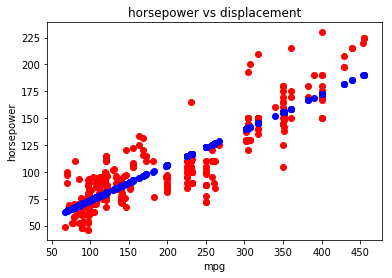

In [30]:
plt.scatter(x,y,color='r')
plt.scatter(x,model.predict(x), color='b')
plt.xlabel('displacement')
plt.ylabel('horsepower')
plt.title('horsepower vs displacement')

Let us print out the real $a$ and $b$.

In [31]:
print(model.coef_[0], model.intercept_[0])

[0.32839994] 40.775091901619525


## Final words

This notebook is just to introduce you to dealing with a non-standard missing values and building a simple linear regression model.